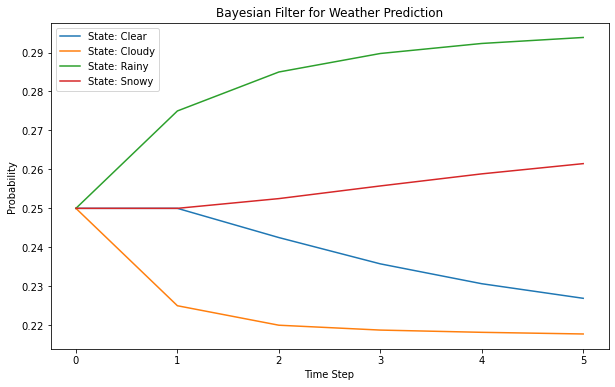

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 확률 분포
prior_probs = np.array([0.25, 0.25, 0.25, 0.25])  # 맑음, 흐림, 비, 눈

# 날씨의 각 상태 변화 확률
transition_probs = np.array([[0.7, 0.2, 0.1, 0.0],
                             [0.3, 0.4, 0.2, 0.1],
                             [0.0, 0.2, 0.6, 0.2],
                             [0.0, 0.1, 0.2, 0.7]])

# 관측 모델(에미션 모델) - 날씨의 각 상태에서 비가 올 확률
observation_probs = np.array([[0.1, 0.3, 0.8, 0.5]])

def bayesian_filter(prior_probs, transition_probs, observation_probs, n_steps):
    filtered_probs = np.zeros((n_steps+1, len(prior_probs)))
    filtered_probs[0] = prior_probs

    for t in range(1, n_steps+1):
        # 예측 단계 (상태 전이)
        predicted_probs = np.dot(filtered_probs[t-1], transition_probs)

        # 업데이트 단계 (측정 모델을 통한 업데이트)
        observation = np.dot(observation_probs, predicted_probs)
        updated_probs = predicted_probs * observation

        # 정규화
        updated_probs /= np.sum(updated_probs)

        filtered_probs[t] = updated_probs

    return filtered_probs

# 5번의 시간 단계 동안의 예측 및 업데이트
n_steps = 5
filtered_probs = bayesian_filter(prior_probs, transition_probs, observation_probs, n_steps)

# 결과 시각화
plt.figure(figsize=(10, 6))
weather_states = ['Clear', 'Cloudy', 'Rainy', 'Snowy']
for i in range(len(prior_probs)):
    plt.plot(filtered_probs[:, i], label=f'State: {weather_states[i]}')

plt.title('Bayesian Filter for Weather Prediction')
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.legend()
plt.show()